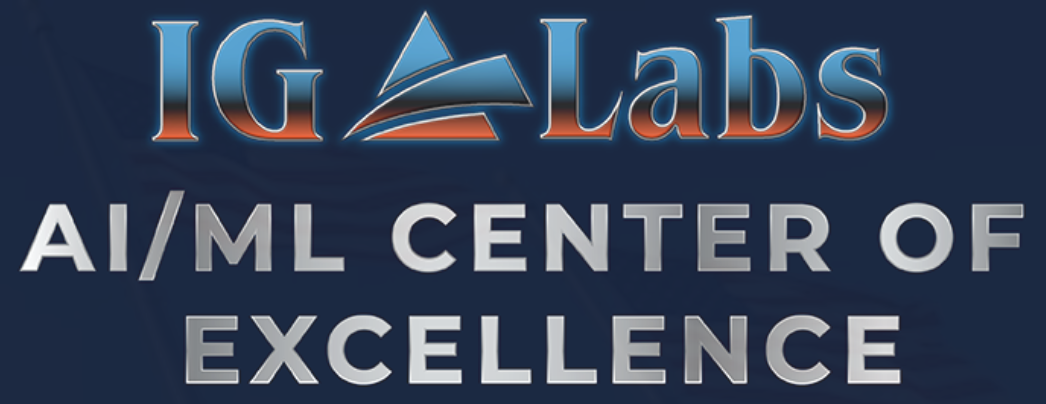

# Data Visualization with Bokeh and Jupyter Notebook

In [2]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import pandas as pd
import numpy as np

In [7]:
output_notebook()

Loading BokehJS ...

## Short data exploration
This blog post aims at explaining how to use Bokeh in combination with Juypter Notebooks, so the focus will not be on creating a complete exploratory data analysis (EDA). Still, we will take a short look at the data we will be working with before we move forward.

Let’s first load the data and create a smaller sample in order to keep things simple and fast:

In [3]:
data = pd.read_csv("diamonds.csv").drop("Unnamed: 0", axis=1)
data = data.sample(3000, random_state=420)

We’re using pandas’s read_csv function to load the data. The column Unnamed: 0 gets dropped, because there is no relevant information there.

If you want to recreate the exact same result as I got in this post, you also need to set random_state in the second line of the code to 420.

In the next step, let’s try to get a short overview of the data and the data types:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 44744 to 42084
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    3000 non-null   float64
 1   cut      3000 non-null   object 
 2   color    3000 non-null   object 
 3   clarity  3000 non-null   object 
 4   depth    3000 non-null   float64
 5   table    3000 non-null   float64
 6   price    3000 non-null   int64  
 7   x        3000 non-null   float64
 8   y        3000 non-null   float64
 9   z        3000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 257.8+ KB


We can see that we have seven numeric and three categorical variables. Below you can find a short explanation of each variable:

    Carat:  the weight of a diamond
    Cut:  Quality of the cut with five possible values (Fair/Good/Very Good/Premium/ Ideal)
    Color:  the color of a diamond with color codes from D (the best) to J (the worst)
    Clarity:  the clarity of a diamond with eight possible values
    X:  the length of a diamond (mm)
    Y: the height of a diamond (mm)
    Z: the depth of a diamond (mm)
    Depth: calculated as Z / average(X, Y)
    Table:  the ratio of the height of a diamond to its widest point
    Price:  the price of a diamond in dollars

## Simple plotting with glyphs
Finally, this is the point where we define our first, very simple Bokeh plot! So-called glyphs are used in order to create plots in Bokeh. A glyph can be a line, square, wedge, circle and so on.

In the example below, we use the circle method of our figure object, called p. Inside this function, we define the values of the x- (data.carat) and y-axes (data.price), the size and color of the circles, and how transparent the circles should be.

In [8]:
p = figure(width=800, height=400)

# add a circle renderer with a size, color, and alpha
p.circle(data.carat, data.price, size=20, color="navy", alpha=0.2)

# show the results
show(p)

Please note that the toolbar at the right side comes out of the box!

As you can see, this plot is already interactive, to some degree. For example, we can zoom in/out and reset the view. Let’s now go a step further and add some annotations to our plots.

## Adding annotations to data plots
First of all, a plot without a header describing what is being displayed is not the right way of visualizing data.

In [9]:
# add a title with providing the title parameter
p = figure(width=800, height=400, title="Distribution of Price")

# compute the histogram of the price variable 
hist, edges = np.histogram(data.price, density=True, bins=50)

# call the quad method on our figure object p
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

show(p)

Above, you can see how easy it is to add a title to your Bokeh plots. In line 2, we simply need to specify the title by setting the title parameter. In Bokeh, you firstly need to transform your data in order to create a histogram. In this case, I used the NumPy method histogram() for this. This method returns the actual value of the histogram (hist) and the bin edges (edges), which we then can pass to the quad method of the figure object p in line 8.

But what if we wanted to specify the position of the title, and we wanted a title for each axis? Well, Bokeh also offers a simple solution to this problem:

In [10]:
from bokeh.palettes import Spectral7
from bokeh.models import Title

# prepare the colors and their value counts
colors = sorted(list(data.color.unique()))
counts = [i for i in data.color.value_counts().sort_index()]

p = figure(x_range=colors, width=800, height=400)

p.vbar(x=colors, top=counts, width=0.9, color=Spectral7)

p.y_range.start = 0

p.add_layout(Title(text="Colors", align="center"), "below")
p.add_layout(Title(text="Color counts", align="center"), "left")

show(p)

First, let’s take a look at the imports again. In the first line, we import a color palette called Spectral7, which is a list of seven hex RGB strings that we can use as to color in our plot.

Secondly, we import the Title object, which allows us to render titles and specify their positioning. Before we can plot the value counts of each color, we need to prepare the data so that Bokeh can properly understand it. For that, I stored the colors in a list called colors, and the corresponding value counts in a list called counts. These two lists are used in the vbar method, which renders vertical bars.

The interesting part here, though, is in lines 14 and 15, where we call the add_layout method on the figure object p. There, we define the titles and their positions. We defined below and left as the positions here; you can also use top and right as values for positioning.

## Adding annotations to stacks and legends
In this section, we’ll take a look at a more advanced plot with stacked bars and a legend. Consider the below code.

In [11]:
from bokeh.palettes import GnBu5

# data preparation
colors = list(data.color.unique()) 
cut = list(data.cut.unique())

ideal = [data[(data.cut == "Ideal") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
very_good = [data[(data.cut == "Very Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
premium = [data[(data.cut == "Premium") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
good = [data[(data.cut == "Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
fair = [data[(data.cut == "Fair") & (data.color == colors[i])].shape[0] for i in range(len(colors))]

data_stacked = {'colors': colors,
                'Ideal': ideal,
                'Very Good': very_good,
                'Premium': premium, 
                'Good': good, 
                'Fair': fair}

p = figure(x_range=colors, width=800, height=400, title="Colors counts by cut")

p.vbar_stack(cut, x='colors', width=0.9, color=GnBu5, source=data_stacked,
             legend_label=cut)

p.y_range.start = 0
p.y_range.end = 1000
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

n this example, we use the color palette GnBu5. Then, in lines 4 and 5, we create lists of the unique values of cut and color. The lines 7 to 11 contain six lists, where we store the value counts of each color grouped by the cut.

When applied to the example below, it means that for a cut with the value ideal, we iterate over all colors and store their value counts in the list called ideal. We then repeat this for every cut available in the data set.

ideal = [data[(data.cut == "Ideal") & (data.color == colors[i])].shape[0] for i in range(len(colors))]

These lists get stored in the dictionary called data_stacked, which will be used again in line 22. There, we’ll create a the actual plot by calling the method vbar_stack on the figure object p. In this context, it is important to note that vbar_stack provides an argument called legend_labelthat you can use to define the variables that are relevant for the legend.

Finally, in the lines 27 and 28, we specify the position and orientation of the legend.


## Adding annotations to colored legends
The last thing we’re taking a look at in the context of annotations are colored legends:

In [12]:
from bokeh.transform import linear_cmap
from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6

y = list(data.price.values)
x = list(data.carat.values)

mapper = linear_cmap(field_name="y", palette=Spectral6 ,low=min(y) ,high=max(y))

source = ColumnDataSource(dict(x=x,y=y))

p = figure(width=800, height=400)

p.circle(x='x', y='y', line_color=mapper, color=mapper, fill_alpha=1, size=12, source=source)

color_bar = ColorBar(color_mapper=mapper['transform'], height=300, width=10)

p.add_layout(color_bar, 'right')

show(p)

We introduce some new things in this plot. The first new thing is the linear_cmap() function, which we use in line 8 to create a color mapper.

mapper = linear_cmap(field_name="y", palette=Spectral6 ,low=min(y) ,high=max(y))

The attribute field_name specifies the actual data to map colors to, palette the colors being used, low the lowest value mapping a color to and max the highest value.

The second new aspect is the ColumnDataSource object defined in line 10. This is an own-data structure introduced by Bokeh itself. So far, the lists and NumPy arrays have been converted to ColumnDataSource objects implicitly by Bokeh, but here, we’re doing it on our own. It’s pretty simple, we just need to provide our data in a form of a dictionary.

source = ColumnDataSource(dict(x=x,y=y))

And lastly, we create a ColorBar in line 15. There, we use our instance of a ColorMapper called mapper. This is actually a dictionary that contains the keys field and transform; here, we’re only interested in the transform key values. That’s why we have to code it like the following:

color_bar = ColorBar(color_mapper=mapper['transform'], height=300, width=10)

The variable color_bar is then added to the layout in line 18 on the right side of the plot!

## Creating layouts
In some cases, you’ll want to render several plots next to each other. That’s where Bokeh’s layout function comes into place. Let’s see what it takes to create a row layout.

In [14]:
from bokeh.layouts import row

p1 = figure(width=250, height=200)
hist1, edges1 = np.histogram(data.price, density=True, bins=50)
p1.quad(top=hist1, bottom=0, left=edges1[:-1], right=edges1[1:], line_color="white")

p2 = figure(width=250, height=200)
hist2, edges2 = np.histogram(data.carat, density=True, bins=50)
p2.quad(top=hist2, bottom=0, left=edges2[:-1], right=edges2[1:], line_color="white")

p3 = figure(width=250, height=200)
hist3, edges3 = np.histogram(data.depth, density=True, bins=50)
p3.quad(top=hist3, bottom=0, left=edges3[:-1], right=edges3[1:], line_color="white")

p4 = figure(width=250, height=200)
hist4, edges4 = np.histogram(data.table, density=True, bins=50)
p4.quad(top=hist4, bottom=0, left=edges4[:-1], right=edges4[1:], line_color="white")


show(row(p1, p2, p3, p4))

This is pretty straightforward. First, import the row function from Bokeh and the instead of doing show(p), use the following code: show(row(p1, p2, p3, p4)).

If you want to create a grid layout, just replace row with gridplot:

In [15]:
from bokeh.layouts import gridplot

show(gridplot([[p1, p2], [p3, p4]]))

## Using themes in Bokeh
Implementing themes in Bokeh is also a pretty easy task. You can choose from Bokeh’s inbuilt themes or create your own. For the sake of simplicity, we’re using an inbuilt theme called night_sky.

To implement the night_sky theme, just do the following: curdoc().theme = 'night_sky'

In [16]:
from bokeh.io import curdoc

curdoc().theme = 'night_sky'

p = figure(width=800, height=400, title="Distribution of Price")

hist, edges = np.histogram(data.price, density=True, bins=50)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

show(p)

The curdoc function returns the document for the current state. By calling curdoc().theme, you can change the theme for the whole Jupyter Notebook.

If you’re interested in creating your own theme, feel free to check out Bokeh’s docs.

## Making data plots interactive
This is probably the most interesting part of Bokeh, since this is what makes Bokeh unique. We will start by configuring the plot tools.

In [19]:
p = figure(width=800, height=400, tools="hover")

curdoc().theme = 'light_minimal'

p.circle(data.carat, data.price, size=20, color="navy", alpha=0.2)

show(p)

In order to add a tool, you just need to specify the tools argument of the figure object. In this case above, we implement the hover tool. There are tons of possibilities Bokeh offers in this context; I’d recommend checking out their docs to get an overview.

In [20]:
p = figure(width=800, height=400, tools="reset, hover, zoom_in, wheel_zoom, pan, save")

p.circle(data.carat, data.price, size=20, color="navy", alpha=0.2)

show(p)

As you can see in line 1 above, you can simply add tools of your choice as a string. For example, we implemented the wheel zoom and save tools!

## Using Bokeh widgets for interactivity
Bokeh also allows us to create widgets in order to provide an interactive frontend/UI. In the following code block, we’ll have a look at some of these widgets.

In [23]:
from bokeh.layouts import column
from bokeh.models import Slider

y = list(data.price.values)
x = list(data.carat.values)

mapper = linear_cmap(field_name="y", palette=Spectral6 ,low=min(y) ,high=max(y))

source = ColumnDataSource(dict(x=x,y=y))

p = figure(width=800, height=400,  tools="hover")

r = p.circle(x='x', y='y', line_color=mapper, color=mapper, fill_alpha=1, size=12, source=source)

slider = Slider(start=0.01, end=0.15, step=0.01, value=0.01)
slider.js_link('value', r.glyph, 'radius')

show(column(p, slider))

In the example above, we implemented a slider that allows us to change the size of the circles of our plot. Lines 1-13 are not new; only the last three lines contain new content.

In line 15, we call the Slider object and define start, end, step, and the initial values. In the line after, we then call the js_link method on this just-created Slider object. This method lets us link the circle glyph and the Slider object. This means that the circle glyph/plot is always updated when the value of the slider changes.

slider.js_link('value', r.glyph, 'radius')

We are primarily interested in the value of the slider, so we shall define it as our first argument. Secondly, we pass a Bokeh model, which should be linked to the first argument (value), which should be our glyph object, r. Lastly, we pass radius as the property of r.glyph to be changed and tell Bokeh to render the plot and the slider on top of each other in a column.

We cannot only link a slider to our plots, but also a color picker!

In [24]:
from bokeh.models import ColorPicker

p = figure(width=800, height=400)

circle = p.circle(data.carat, data.price, size=20, color="black", alpha=0.3)

picker = ColorPicker(title="Circle Color")
picker.js_link('color', circle.glyph, "fill_color")

show(column(p, picker))

This is even easier than implementing the size slider! For the ColorPicker, we only provide a title — the rest will be done by Bokeh automatically.

picker = ColorPicker(title="Circle Color")

picker.js_link('color', circle.glyph, "fill_color")

In this case, the attribute to be changed is not the value, as in the first example, but the color of the glyph. In addition, the fill_color should be linked and not the radius.

## Implementing an interactive legend
Next, we’re going to implement an interactive legend. Once a legend item is clicked, the corresponding data should hide or show in the plot.

In [25]:
colors = list(data.color.unique()) 

ideal = [data[(data.cut == "Ideal") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
very_good = [data[(data.cut == "Very Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
premium = [data[(data.cut == "Premium") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
good = [data[(data.cut == "Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
fair = [data[(data.cut == "Fair") & (data.color == colors[i])].shape[0] for i in range(len(colors))]

cut = list(data.cut.unique())

data_stacked = {'colors': colors,
                'Ideal': ideal,
                'Very Good': very_good,
                'Premium': premium, 
                'Good': good, 
                'Fair': fair}

p = figure(x_range=colors, width=800, height=400, title="colors counts by cut",
           toolbar_location=None, tools="hover")

p.vbar_stack(cut, x='colors', width=0.9, color=GnBu5, source=data_stacked,
             legend_label=cut)


p.y_range.start = 0
p.y_range.end = 1000
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.click_policy="hide"

show(p)

Again, most of the code should look familiar to you. Only the following line is new:

p.legend.click_policy="hide"

That’s easy right? You could alternatively pass mute as a value here; then, the clicked data wouldn’t disappear, but would instead be muted (its opacity would change).

## Creating tabs for multiple plots
Earlier, I explained to you how to implement layouts in order to render several plots in a row, grid, or column. Bokeh offers another solution to this problem, which provides us with the opportunity to create tabs!



In [29]:
colors = list(data.color.unique()) 

ideal = [data[(data.cut == "Ideal") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
very_good = [data[(data.cut == "Very Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
premium = [data[(data.cut == "Premium") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
good = [data[(data.cut == "Good") & (data.color == colors[i])].shape[0] for i in range(len(colors))]
fair = [data[(data.cut == "Fair") & (data.color == colors[i])].shape[0] for i in range(len(colors))]

cut = list(data.cut.unique())

data_stacked = {'colors': colors,
                'Ideal': ideal,
                'Very Good': very_good,
                'Premium': premium, 
                'Good': good, 
                'Fair': fair}

p = figure(x_range=colors, width=800, height=400, title="colors counts by cut",
           toolbar_location=None, tools="hover")

p.vbar_stack(cut, x='colors', width=0.9, color=GnBu5, source=data_stacked,
             legend_label=cut)


p.y_range.start = 0
p.y_range.end = 1000
p.legend.location = "top_left"
p.legend.orientation = "horizontal"
p.legend.click_policy="hide"

show(p)

## Further customizing Bokeh with JavaScript
Finally, we will have a closer look at the most advanced example in this blog post. Until now, we used interaction tools, which come out of the box with Bokeh. But there is also the possibility to add custom JavaScript in order to supply a very custom behavior in response to events or changes.

In [28]:
from bokeh.models import CustomJS

y = list(data.price.values)
x = list(data.carat.values)

s1 = ColumnDataSource(dict(x=x,y=y))
p1 = figure(width=300, height=300,  tools="lasso_select", x_range=(0, 3) , y_range=(0, 20000))
p1.circle(x='x', y='y', fill_alpha=1, source=s1)

s2 = ColumnDataSource(data=dict(x=[], y=[]))
p2 = figure(width=300, height=300, tools="lasso_select", x_range=(0, 3) , y_range=(0, 20000))
p2.circle('x', 'y', fill_alpha=1, source=s2)

s1.selected.js_on_change('indices', CustomJS(args=dict(s1=s1, s2=s2), code="""
        const inds = cb_obj.indices;
        const d1 = s1.data;
        const d2 = s2.data;
        d2['x'] = []
        d2['y'] = []
        for (let i = 0; i < inds.length; i++) {
            d2\['x'].push(d1['x'\][inds[i]])
            d2\['y'].push(d1['y'\][inds[i]])
        }
        s2.change.emit();
    """)
)

show(row(p1, p2))

In this example, we first create two plots (p1 and p2). In the beginning, only p1 is provided with data; p2 has no data provided, and is therefore empty by default.

This gets changed from line 14 on. There, we define a js_on_change method, where you can attach a CustomJS callback. This CustomJS model allows us to create a JavaScript snippet which gets executed when some event occurs.

I won’t go too much into the details of the JavaScript code here, but I will try to outline it in a comprehensible way. Our code is listening for an event, which we’ve defined as data points being selected in the first plot. Once those points are selected, their x and y coordinates will be stored in the variable s2, which is the data basis of the second plot. And once these changes are stored successfully in s2, the corresponding points will be rendered in the figure object p2 on the right side.

If you’re interested, you can check out Bokeh’s docs to get an overview of all the opportunities to create and embed custom JS callbacks.